# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

__This data is about some movies and its properties like who is director? , when it released ? , how much its revenue and budget? and some others.This data set contains information about 10,000 movies collected from The Movie Database (TMDb)__

`Questions that we want to answer through the analysis we will do:`
1. Which genres are most popular from year to year?
2.  What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [4]:
df = pd.read_csv("C:\\Users\\Taha CompuTech\\Desktop\\udacity\\Advanced_Data_Analysis\\tmdb-movies.csv")

In [5]:
df.shape

(10866, 21)

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4671,82533,tt1667307,0.319294,0,0,Damsels in Distress,Greta Gerwig|Carrie MacLemore|Megalyn Echikunw...,http://www.sonyclassics.com/damselsindistress/,Whit Stillman,"For these girls... it's not what you learn, it...",...,A trio of beautiful girls set out to revolutio...,99,Comedy|Romance,Westerly Films,4/6/12,34,5.6,2012,0.000000e+00,0.000000
10045,17009,tt0099878,0.340804,0,20,Jetsons: The Movie,George O'Hanlon|Mel Blanc|Penny Singleton|Tiff...,NaN,Joseph Barbera|William Hanna,The first movie from the family that's truly a...,...,George Jetson is forced to uproot his family w...,82,Animation|Comedy|Family|Science Fiction,Universal Studios|Hanna-Barbera Productions,6/6/90,22,5.8,1990,0.000000e+00,33.377971
5944,209355,tt2609222,0.223581,5112027,0,Quai d'Orsay,Thierry Lhermitte|RaphaÃ«l Personnaz|Niels Are...,NaN,Bertrand Tavernier,NaN,...,Alexandre Taillard de Vorms is a force to be r...,113,Comedy,Site 4 View Productions,11/6/13,55,5.5,2013,4.785028e+06,0.000000
4486,134375,tt2308733,0.756000,0,0,Home Alone: The Holiday Heist,Jodelle Ferland|Christian Martyn|Ellie Harvie|...,http://www.facebook.com/HomeAloneFive,Peter Hewitt,Hit the jump for more,...,8-year-old Finn who is terrified to learn his ...,87,Comedy|Crime|Family,Original Pictures|Fox Television Studios|Manit...,11/25/12,29,5.2,2012,0.000000e+00,0.000000
5925,257874,tt2991296,0.162886,89,0,Beneath,Brent Briscoe|Kurt Caceres|Eric Etebari|Jeff F...,NaN,Ben Ketai,NaN,...,A crew of coal miners becomes trapped 600 feet...,89,Horror,Revolver Picture Company|Elevative Entertainment,10/8/13,31,4.8,2013,8.330697e+01,0.000000


In [9]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


In [12]:
dropped_labels = ['runtime', 'id', 'imdb_id', 'homepage', 'keywords', 'runtime', 'release_date', 'budget', 'revenue']
df.drop(labels=dropped_labels, axis=1, inplace=True)

In [13]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'tagline',
       'overview', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [14]:
df.head(3)

,popularity,original_title,cast,director,tagline,overview,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [15]:
df.drop('tagline', axis=1, inplace=True)

In [16]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'overview',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [17]:
df = df.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'})
df.head()

,popularity,original_title,cast,director,overview,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   overview              10862 non-null  object 
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget                10866 non-null  float64
 11  revenue               10866 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1018.8+ KB


In [19]:
df.sample(4)

,popularity,original_title,cast,director,overview,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
3714,0.286905,PrÃ©sumÃ© coupable,Philippe Torreton|Wladimir Yordanoff|NoÃ©mie L...,Vincent Garenq,Investigates the corrupt judicial system under...,Drama,Nord-Ouest Productions|Canal+|France3 CinÃ©ma,20,7.5,2011,6.752416e+06,0.000000e+00
10243,0.892862,For Love or Money,Michael J. Fox|Gabrielle Anwar|Anthony Higgins...,Barry Sonnenfeld,New York concierge Doug Ireland wants to go in...,Comedy|Romance,Universal Studios|Imagine Entertainment,35,5.4,1993,4.528410e+07,1.682496e+07
5832,0.240375,Downloaded,Sean Parker|Shawn Fanning|Lars Ulrich|Jon Stew...,Alex Winter,A documentary that explores the downloading re...,Documentary,VH1 Rock Docs,19,6.5,2013,0.000000e+00,0.000000e+00
10704,0.243896,Von Ryan's Express,Frank Sinatra|Trevor Howard|Raffaella CarrÃ |B...,Mark Robson,Von Ryan's Express stars Frank Sinatra as a PO...,Action|Drama|History|Thriller|War,P-R Productions Picture,20,6.2,1965,3.986245e+07,0.000000e+00


In [20]:
df.head()

,popularity,original_title,cast,director,overview,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   overview              10862 non-null  object 
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget                10866 non-null  float64
 11  revenue               10866 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1018.8+ KB


In [23]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


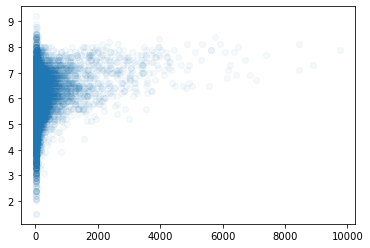

In [30]:
plt.scatter(df.vote_count, df.vote_average, alpha=0.045)

In [33]:
p_compines_counts = df.production_companies.value_counts()

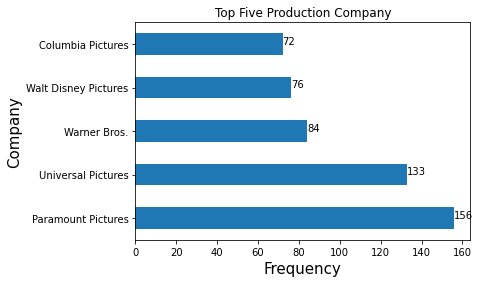

In [35]:
p_compines_counts.head().plot(kind='barh')
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Company", fontsize=15)
plt.title("Top Five Production Company")
for index, value in enumerate(p_compines_counts.head()):
  plt.text(value, index, str(value))

In [41]:
genres_counts = df.genres.value_counts()


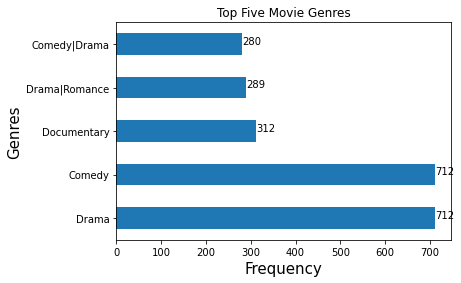

In [42]:
genres_counts.head().plot(kind='barh')
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Genres", fontsize=15)
plt.title("Top Five Movie Genres")
for index, value in enumerate(genres_counts.head()):
  plt.text(value, index, str(value))

Text(0.5, 1.0, 'Top Five Vote Count Movies')

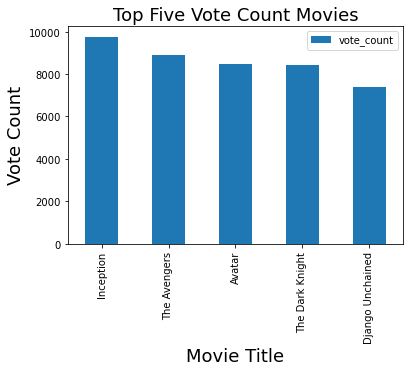

In [57]:
df.sort_values(by = 'vote_count', ascending=False).head().plot(x='original_title', y='vote_count', kind='bar')
plt.xlabel("Movie Title", fontsize=18)
plt.ylabel("Vote Count", fontsize=18)
plt.title('Top Five Vote Count Movies', fontsize=18)

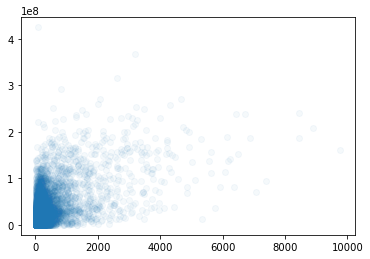

In [45]:
plt.scatter(df.vote_count, df.budget, alpha=0.045)

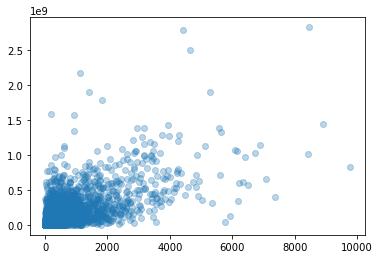

In [51]:
plt.scatter(df.vote_count, df.revenue, alpha=0.3)

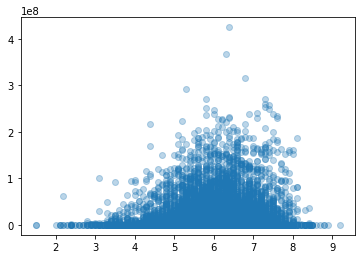

In [53]:
plt.scatter(df.vote_average, df.budget, alpha=0.3)

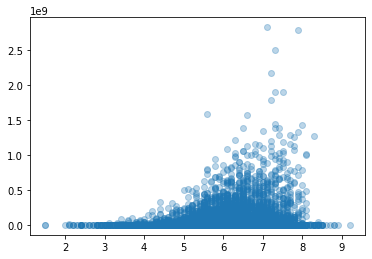

In [54]:
plt.scatter(df.vote_average, df.revenue, alpha=0.3)

In [47]:
df.corr()

,popularity,vote_count,vote_average,release_year,budget,revenue
popularity,1.000000,0.800828,0.209511,0.089801,0.513550,0.609083
vote_count,0.800828,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget,0.513550,0.587051,0.093039,0.016793,1.000000,0.646607
revenue,0.609083,0.707942,0.193085,-0.066256,0.646607,1.000000


In [55]:
df.drop(labels='vote_average', axis=1, inplace=True)
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'overview',
       'genres', 'production_companies', 'vote_count', 'release_year',
       'budget', 'revenue'],
      dtype='object')

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>]], dtype=object)

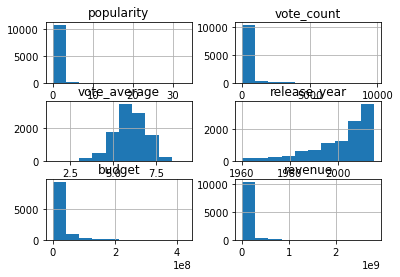

In [52]:
df.hist()

Text(0.5, 1.0, "Top Five Movie's Revenue")

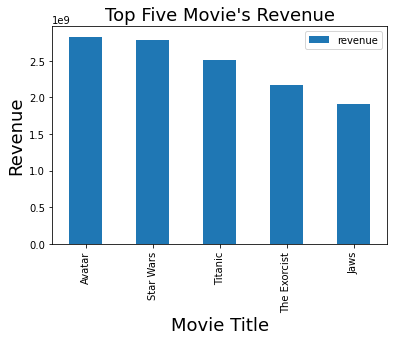

In [62]:
df.sort_values(by = 'revenue', ascending=False).head().plot(x='original_title', y='revenue', kind='bar')
plt.xlabel("Movie Title", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.title('Top Five Movie\'s Revenue', fontsize=18)

Text(0.5, 1.0, "Top Five Movie's Genres Revenue")

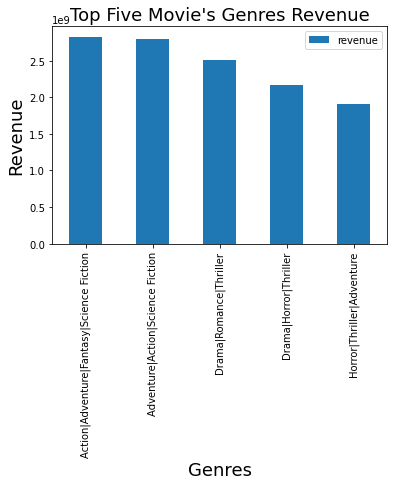

In [65]:
df.sort_values(by = 'revenue', ascending=False).head().plot(x='genres', y='revenue', kind='bar')
plt.xlabel("Genres", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.title('Top Five Movie\'s Genres Revenue', fontsize=18)

Text(0.5, 1.0, "Top Five Movie's Director with highest Revenue")

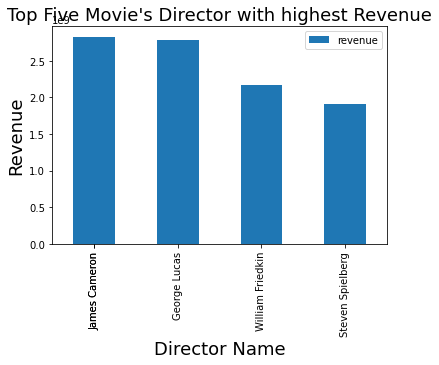

In [67]:
df.sort_values(by = 'revenue', ascending=False).head().plot(x='director', y='revenue', kind='bar')
plt.xlabel("Director Name", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.title('Top Five Movie\'s Director with highest Revenue', fontsize=18)

In [68]:
df.corr()

,popularity,vote_count,release_year,budget,revenue
popularity,1.000000,0.800828,0.089801,0.513550,0.609083
vote_count,0.800828,1.000000,0.107948,0.587051,0.707942
release_year,0.089801,0.107948,1.000000,0.016793,-0.066256
budget,0.513550,0.587051,0.016793,1.000000,0.646607
revenue,0.609083,0.707942,-0.066256,0.646607,1.000000


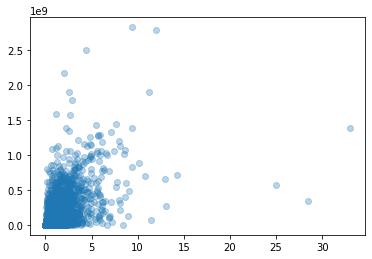

In [69]:
plt.scatter(df.popularity, df.revenue, alpha=0.3)